In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
df = pd.read_excel("Dataset_ENTicipate.xlsx")

# Feature names is sometimes in all 3 first lines sometime only in the second line
new_columns = []
for col_idx, col_name in enumerate(df.columns):
    if "Unnamed" in str(col_name) or col_name is None:
        # Substitute with value in line 0
        new_columns.append(str(df.iloc[0, col_idx]))
    else:
        new_columns.append(col_name)

# Update the columns name
df.columns = new_columns

df = df.drop(index=[0,1]).reset_index(drop=True)
df.columns = df.columns.str.replace('\n', '', regex=True)

df.rename(columns={
    'Type of surgical procedure (1 partial glossectomy, 2 hemiglossectomy, 3 subtotal/total glossectomy, 4 commando, 5 pharyngectomy, 6 cordectomy, 7 partial laryngectomy, 8 total laryngectomy, 9 PAROTID GLANDctomy, 10 emptying only, 11 thyroidectomy, 12 rhinectomy, 13 maxillectomy, 14 lip excision, 15 ear excision, 16 pharyngolaryngectomy, 17 pharyngoglossectomy, 18 pelvectomy, 19 other procedures)': 'Type of surgical procedure',
}, inplace=True)

df.head()

,ID,Site,Site ID,Sex (0: male; 1: female),Age > 65 years old,Age at diagnosis,Weight (Kg),Usual weight (maintained for at least 6 months),Weight loss (kg),Significant weight loss? (0: no; 1: yes),...,Wound dehiscence,Pulmonary thromboembolism,Complete necrosis of the flap,Partial necrosis of the flap,Necrosis (overall),Other complications,Hypertensive crisis,Any complication,Score Clavien-Dindo (tenere conto della complicanza peggiore),Nosocomial infection
0,1.0,LARYNX,4,0.0,0,64.0,75.0,75.0,0.0,0,...,0.0,0.0,0.0,0.0,0,1.0,0,1,I,0.0
1,2.0,HYPOPHARYNX,5,0.0,0,61.0,70.0,70.0,0.0,0,...,0.0,0.0,0.0,0.0,0,1.0,0,1,IIIB,1.0
2,3.0,LARYNX,4,0.0,0,54.0,112.0,112.0,0.0,0,...,0.0,0.0,0.0,0.0,0,1.0,0,1,II,0.0
3,4.0,LARYNX,4,0.0,1,66.0,72.0,72.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0,1,II,1.0
4,5.0,UNKNOWN FOCUS,7,0.0,0,61.0,75.0,75.0,0.0,0,...,0.0,0.0,0.0,0.0,0,1.0,0,1,I,0.0


In [2]:
# Exploratory Data Analysis (EDA) on the dataset to gain insights into its structure
print("Dataset Info:")
print(df.info())

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Check for missing values
print("Missing Values in Train Set:")
missing=df.isnull().sum()
print(missing[missing > 0])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 64 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ID                                                             574 non-null    float64
 1   Site                                                           574 non-null    object 
 2   Site ID                                                        574 non-null    object 
 3   Sex (0: male; 1: female)                                       574 non-null    float64
 4   Age > 65 years old                                             574 non-null    object 
 5   Age at diagnosis                                               574 non-null    float64
 6   Weight (Kg)                                                    574 non-null    float64
 7   Usual weight (maintained for at least 6 months) 

In [3]:
# Drop the target columns that we don't plan to predict for this early stage
nc_targets=['Tempo di degenza (gg)','Score Clavien-Dindo (tenere conto della complicanza peggiore)', 'Post-operative bleeding','Wound dehiscence','Pulmonary thromboembolism','Complete necrosis of the flap','Partial necrosis of the flap','Necrosis (overall)','Other complications','Hypertensive crisis','Any complication']
df=df.drop(columns=nc_targets)

In [4]:
# Drop the columns that not contain useful informations
# For the dosage it is enough to use the columns that indicate wheter the patient had a prophylactic therapy or not
columns_to_drop=['ID','Site','Prophylactic antibiotic therapy (dosage)','Antibiotic therapy during surgery (dosage)']
df = df.drop(columns=columns_to_drop, errors='ignore')

Correct some values:

In [5]:
df['Pharyngo-/oro-cutaneous fistula'] = df['Pharyngo-/oro-cutaneous fistula'].replace(
      {'fistola oro-cutanea 24/4 per cedimento delle suture endorali': 1}
)
df['Diabetes'] = df['Diabetes'].replace({'intolleranza glucidica modesta': 1}).astype(float)

/tmp/ipython-input-1692927521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pharyngo-/oro-cutaneous fistula'] = df['Pharyngo-/oro-cutaneous fistula'].replace(
/tmp/ipython-input-1692927521.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes'] = df['Diabetes'].replace({'intolleranza glucidica modesta': 1}).astype(float)


In [6]:
# Trasfrom object type columns into numerical
cols = ["Age > 65 years old","Significant weight loss? (0: no; 1: yes)","Vascular comorbidities", "High blood pressure", "Pharyngo-/oro-cutaneous fistula"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

In [7]:
# Numerical columns but in reality they are categorical
cat_cols = [
    "Site ID", "Type of surgical procedure", "Smoking (0: no; 1: yes; 2: ex)",
    "Alcohol (0: no; 1: yes, 2: ex)", "Type of surgery (1=clean, 2=clean-contaminated)","0: normal weight; 1: underweight; 2: overweight"
]
df[cat_cols] = df[cat_cols].astype("object")

In [8]:
# Mapping T,N,Stage columns into simpler stages score (0-4)
import pandas as pd

def to_stage_simple(v):

    # 2. normalizza stringa
    v = str(v).lower().strip()

    # 3. mapping
    if v in ["is", "0"]:
        return 0
    if v.startswith("1") or v.startswith("i"):   # i, ia, ib, iia ecc.
        return 1
    if v.startswith("2") or v.startswith("ii"):
        return 2
    if v.startswith("3") or v.startswith("iii"):
        return 3
    if v.startswith("4") or v.startswith("iv"):  # 4a,4b,iva,ivb
        return 4

    return np.nan
df["T"] = df["T"].apply(to_stage_simple)
df["N"] = df["N"].apply(to_stage_simple)
df["Stage"] = df["Stage"].apply(to_stage_simple)



Missing values:

In [9]:
# Analyze missing values
missing = df.isna().sum()
print("\nNumber of missing values:")
print(missing[missing > 0])


Number of missing values:
Usual weight (maintained for at least 6 months)    134
Significant weight loss? (0: no; 1: yes)           134
Ideal weight (according to Lorentz - Kg)             1
T                                                    4
N                                                    2
Stage                                                2
Divided stage (1= st.1-2 vs 2=st.3-4)                2
Free flap                                            1
Operating time (min)                                 1
Prophylactic antibiotic therapy                      1
Antibiotic therapy during surgery                    1
Nasogastric tube                                     1
Nosocomial infection                                 1
dtype: int64


In [10]:
# Drop rows with missing values in columns N,T,Stage, Free flap, Operating time, Prophylactic antibiotic therapy, Antibiotic therapy during surgery, Nasogastric tube
columns = ['N','T','Stage','Free flap','Operating time (min)','Prophylactic antibiotic therapy','Antibiotic therapy during surgery','Nasogastric tube']
df = df.dropna(subset=columns)

In [11]:
# Drop rows with missing values in the target columns
target_columns = ['Pharyngo-/oro-cutaneous fistula', 'Nosocomial infection']
df = df.dropna(subset=target_columns)
print(f"Data after removing missing values: {df.shape}")

Data after removing missing values: (564, 49)


In [12]:
# Set missing values in Significant weight loss? (0: no; 1: yes) to 0
df['Significant weight loss? (0: no; 1: yes)'] = df['Significant weight loss? (0: no; 1: yes)'].fillna(0)

<Axes: >

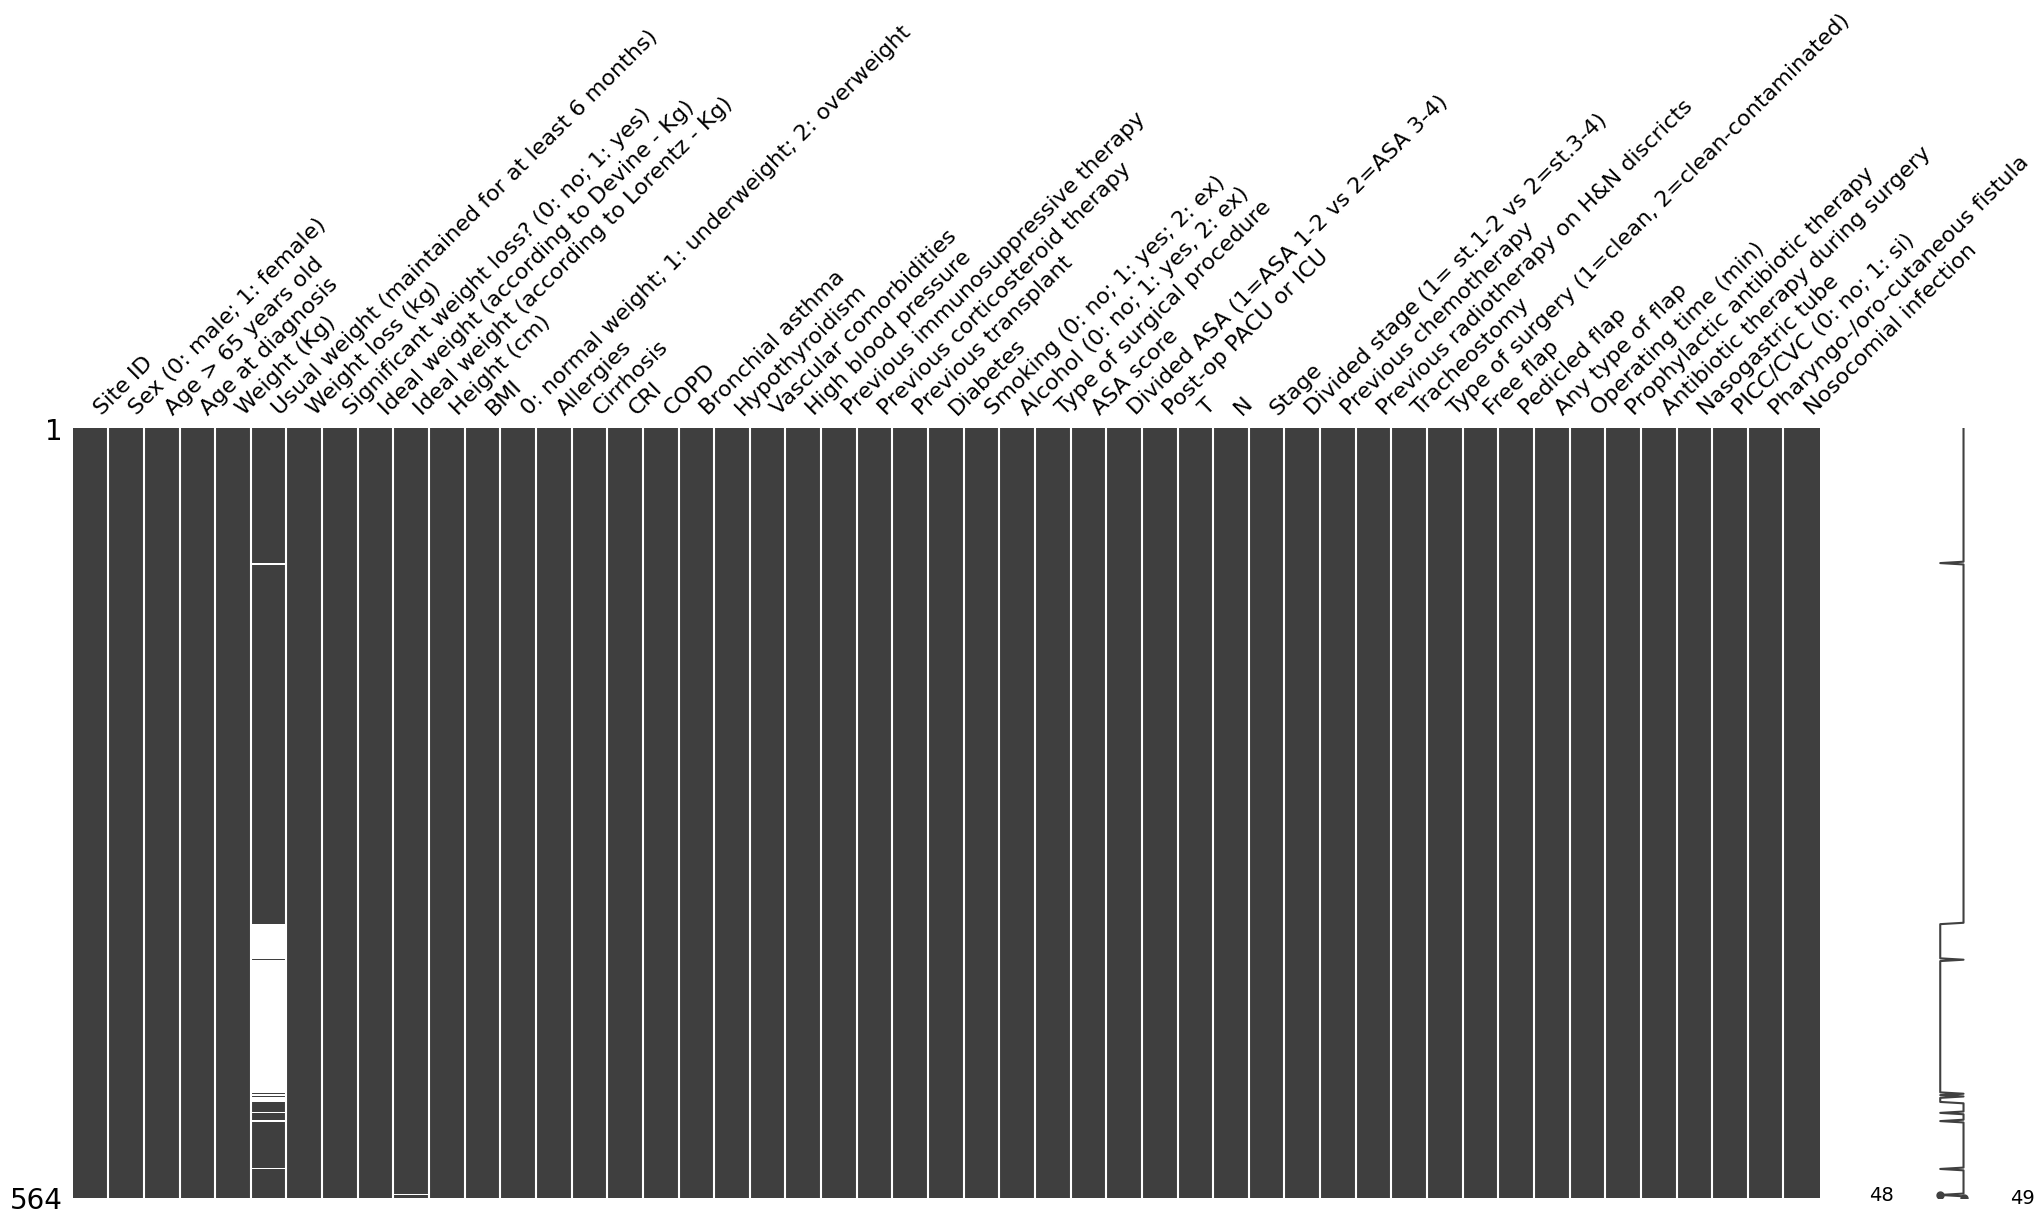

In [13]:
import missingno as msno
msno.matrix(df)

vmin: -0.7050387463806426 vmax: 0.995574477618761


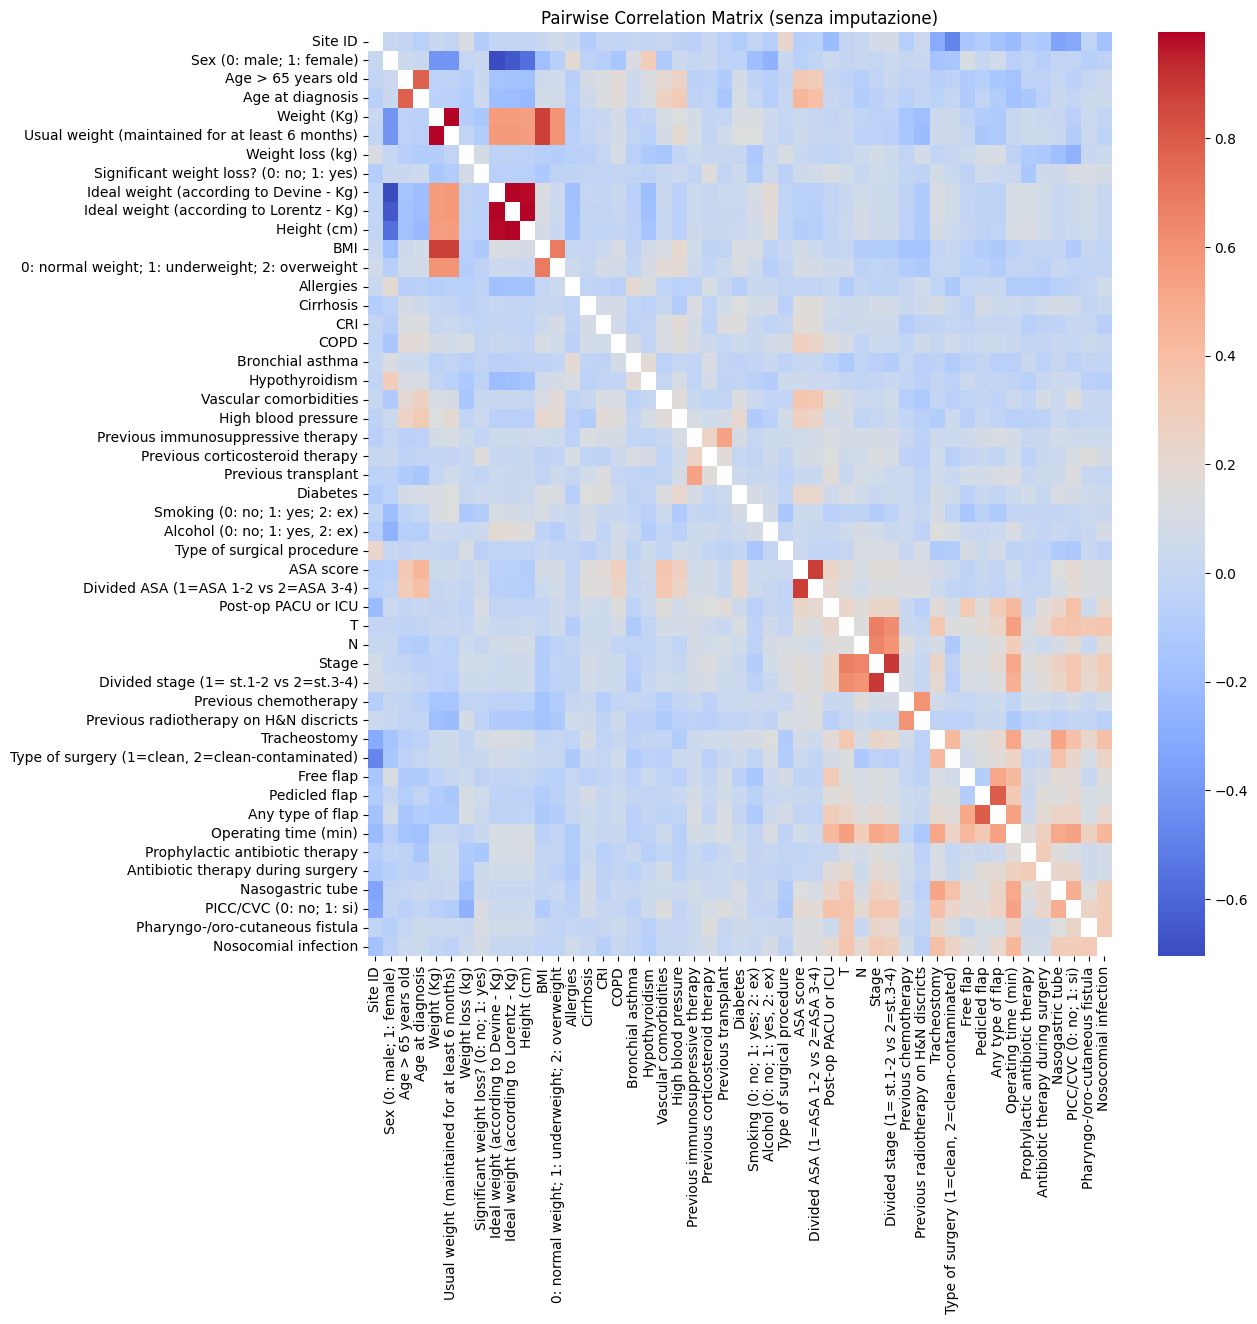

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(method='pearson')

# Remove diagonal
corr_no_diag = corr.copy()
np.fill_diagonal(corr_no_diag.values, np.nan)

valid_vals = corr_no_diag.values[~np.isnan(corr_no_diag.values)]
vmin, vmax = valid_vals.min(), valid_vals.max()
print("vmin:", vmin, "vmax:", vmax)

plt.figure(figsize=(12,12))
sns.heatmap(corr_no_diag, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.title("Pairwise Correlation Matrix (senza imputazione)")
plt.show()


Drop redundant columns:

In [15]:
# Drop Usual weight, Height, Weight loss columns because we have already BMI and significant weight loss columns
df = df.drop(columns=['Usual weight (maintained for at least 6 months)', 'Height (cm)', 'Weight loss (kg)','Weight (Kg)','Ideal weight (according to Devine - Kg)','Ideal weight (according to Lorentz - Kg)'])

In [16]:
# Drop ASA Divided Score because we have already Stage score
df = df.drop(columns=['Divided ASA (1=ASA 1-2 vs 2=ASA 3-4)'])

In [17]:
df = df.drop(columns=['Any type of flap','Age > 65 years old'])

<Axes: >

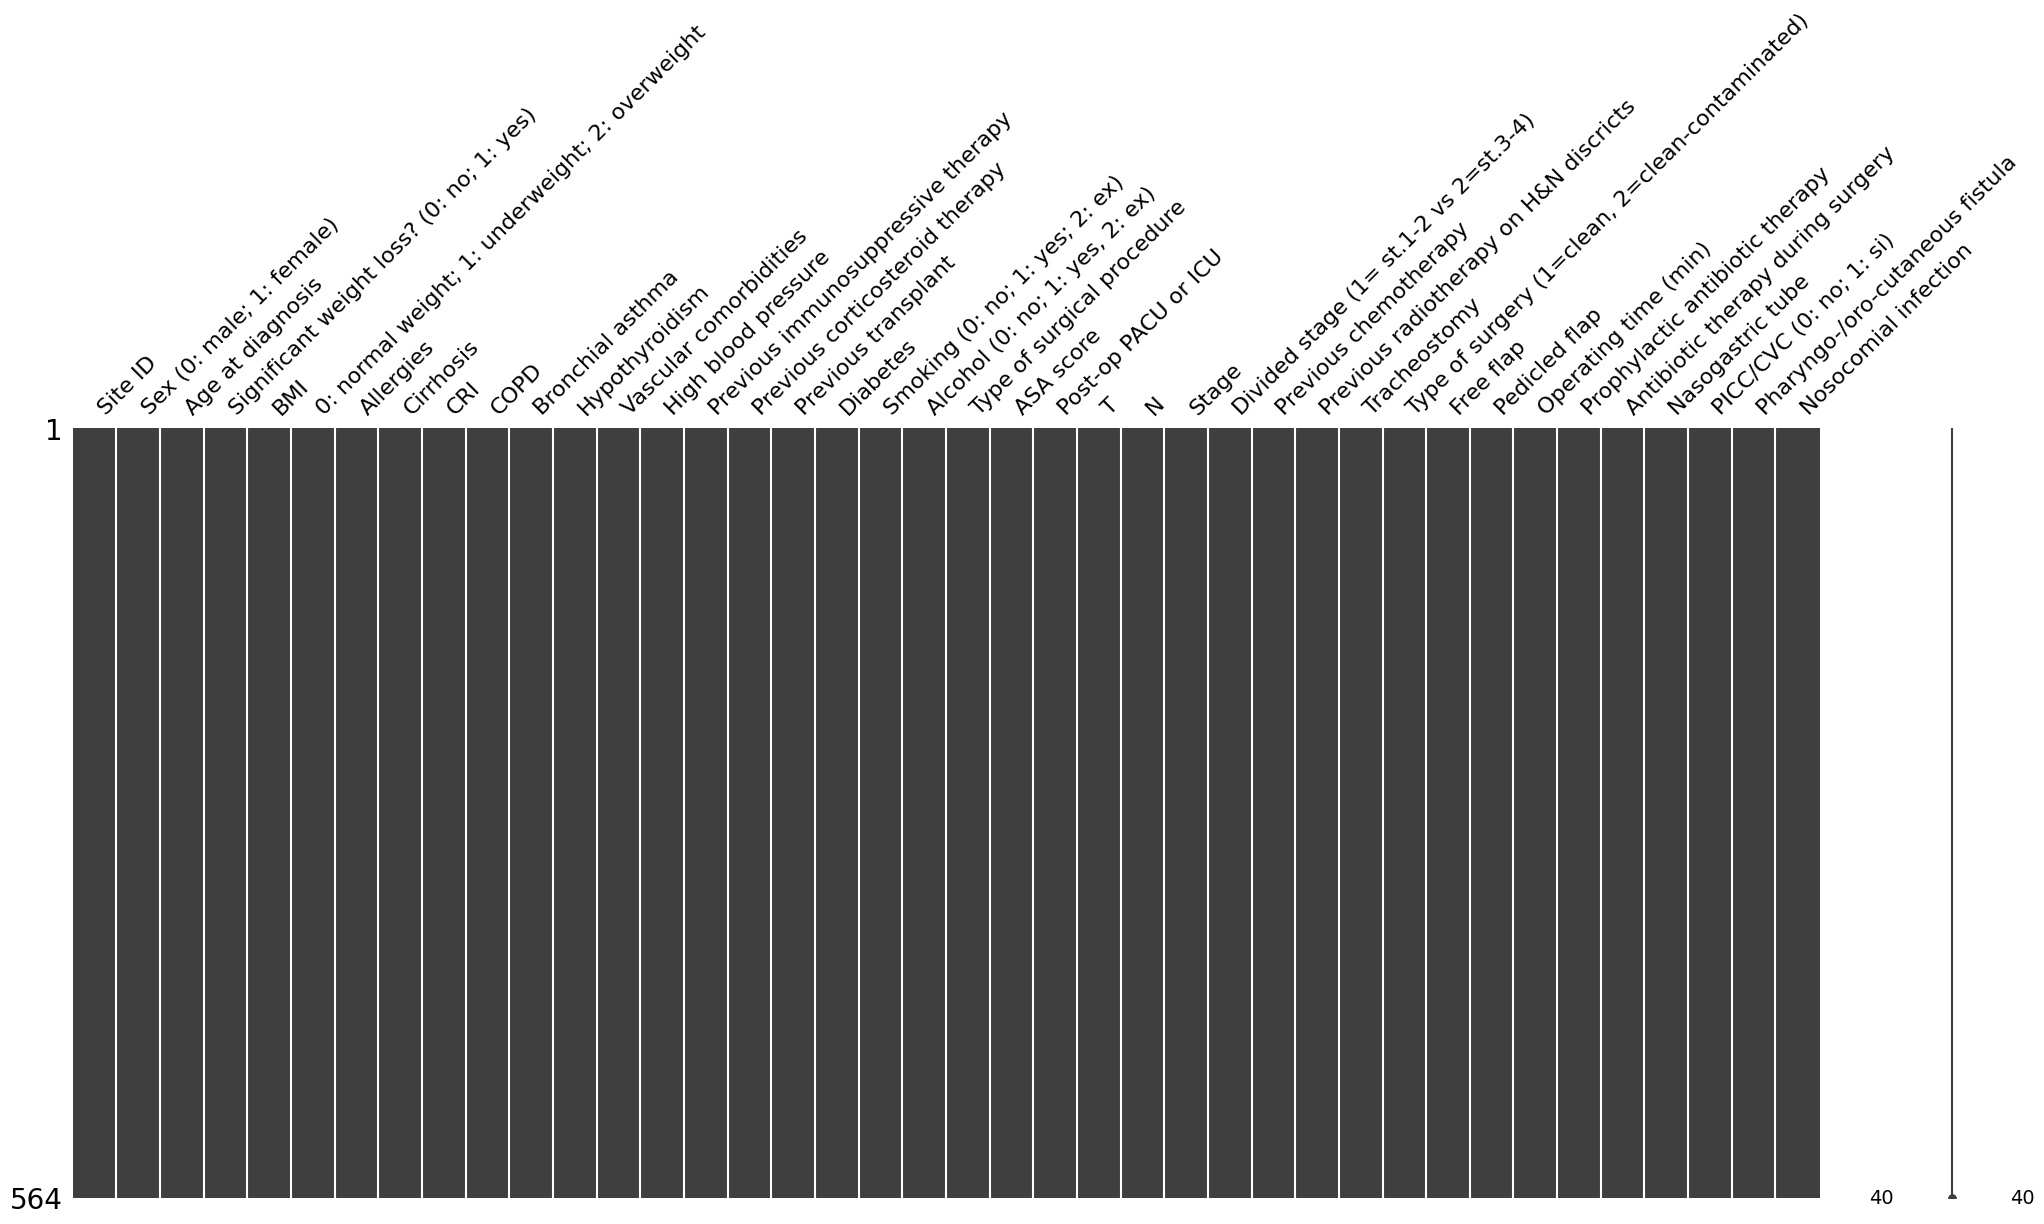

In [18]:
import missingno as msno
msno.matrix(df)

In [19]:
print("Final shape of the dataset:", df.shape)

Final shape of the dataset: (564, 40)


<Axes: xlabel='Pharyngo-/oro-cutaneous fistula', ylabel='count'>

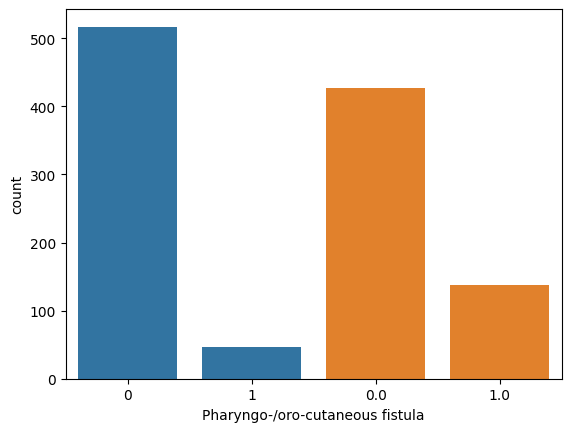

In [20]:
sns.countplot(data=df, x='Pharyngo-/oro-cutaneous fistula')
sns.countplot(data=df, x='Nosocomial infection')


In [21]:
df.to_csv("Dataset_ENTicipate_preprocessed.csv", index=False, encoding="utf-8")
print("File saved as Dataset_ENTicipate_preprocessed.csv")

File saved as Dataset_ENTicipate_preprocessed.csv
